# IS735 - Module 3

## Using PRAW to Create Networks

This notebook contains examples for using web-based APIs (Application Programmer Interfaces) to download data from social media platforms.

This notebook focuses specifically on _Reddit_.

We will use this API to create a network from the Reddit data, focusing on who replied to whom.

In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt 

<hr>

Import `NetworkX` package

In [2]:
# First we need to make sure we have networkx installed...
# !pip install networkx

import networkx as nx

<hr>

## Reddit API

Reddit's API used to be the easiest to use since it did not require credentials to access data on its subreddit pages.
Unfortunately, this process has been changed, and developers now need to create a Reddit application on Reddit's app page located here: (https://www.reddit.com/prefs/apps/).

In [3]:
# First we need to make sure we have praw installed...
# !pip install praw

# For our first piece of code, we need to import the package 
# that connects to Reddit. Praw is a thin wrapper around reddit's 
# web APIs and works well

import praw

### Creating a Reddit Application
Go to https://www.reddit.com/prefs/apps/.
Scroll down to "create application", select "web app", and provide a name, description, and URL (which can be anything).

After you press "create app", you will be redirected to a new page with information about your application. Copy the unique identifiers below "web app" and beside "secret". These are your client_id and client_secret values, which you need below.

In [4]:
# Now we specify a "unique" user agent for our code
# This is primarily for identification, I think, and some
# user-agents of bad actors might be blocked
redditApi = praw.Reddit(client_id='P3y5wDWmFqEJ8A',
                        client_secret='sReJnw2xqq2ZYZBYgxae6pYp4H0',
                        user_agent='PL_SocialMedia')

### Accessing Reddit Comments

While you're never supposed to read the comments, for certain live streams or new and rising posts, the comments may provide useful insight into events on the ground or people's sentiment.
New posts may not have comments yet though.

Comments are attached to the post title, so for a given submission, you can pull its comments directly.

Note Reddit returns pages of comments to prevent server overload, so you will not get all comments at once and will have to write code for getting more comments than the top ones returned at first.
This pagination is performed using the MoreXYZ objects (e.g., MoreComments or MorePosts).

In [5]:
def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if we have the node already in our graph
    if comment.author not in g.nodes:
        g.add_node(comment.author)
        
    # Create an edge between this comment author and the
    #  parent author
    g.add_edge(comment.author, parent_author)

    # Iterate through the comments
    for reply in comment.replies.list():
        if isinstance(reply, praw.models.MoreComments):
            continue
            
        # Recursively process this reply
        recursive_node_adder(g, reply, comment.author)

### Create and Populate the Graph

In [6]:
# Create an undirected graph
g = nx.Graph()


subreddit = "covid"

breadthCommentCount = 10

targetSub = redditApi.subreddit(subreddit)

submissions = targetSub.hot(limit=20)

for post in submissions:
    print (post.author, "-", post.title)
    
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    
    post.comment_limit = breadthCommentCount
    
    # Get the top few comments
    for comment in post.comments.list():
        
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

ADROBLES2024 - /r/COVID has it's own chatroom! (If link doesn't work, check the sidebar.
binxlyostrich - Reckless coworker exposed me
thefactualnews - The Covid Comeback: What's Different This Time?
Sjangtepeltang - I’m Looking for people to share their COVID-19 experiences, thoughts, and opinions with me.
Hoofhearted1965 - The difference between KN95 masks and N95 masks are that the K means it’s certified by China. The N95 masks are certified by the USA. You can not trust China so don’t buy the KN95 masks only buy the N95. China’s standards are a lot lower than ours.
chaos_ensued - Advice needed
rosesandprosecco - How long do I have to wait to see my boyfriend after he has covid?
PuzzleheadedToday690 - Covid meme
mark1241 - Donald Trump Recovers From Covid-19, "Don't be afraid of COVID"
UAEVOICE_EN - The UAE Ministry of Health conducted 102,379 Covid19 examinations during the past 24 hours.
laszlolzsal - Erasmus quarantine
Empty-Interaction-92 - Need help asap
UAEVOICE_EN - The UAE is

### Export Graph

We export the graph using GraphML in `NetworkX`, so we can load it in other software later.

Note, we could use other formats here as well. GraphML is just convenient.

In [7]:
nx.write_graphml(g, "output.reddit.graphml", prettyprint=False)

### Draw the Graph

Now that we've made the graph, let's draw it using the layout algorithms in `NetworkX`.

_NOTE_: `NetworkX` is not meant for graph layouts. We only do this for illustrative purposes.

In [8]:
import matplotlib.pyplot as plt

In [9]:
# pip install scipy

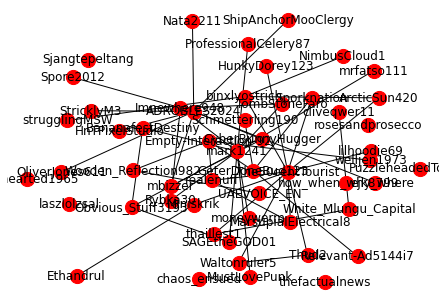

In [10]:
# Use the Spring layout algorithm
pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)

# And draw the graph with node labels
nx.draw(g, 
        pos, 
        node_color='red', 
        width=1, 
        with_labels=True,
        node_size=200)

In [11]:
print("Nodes:")
for node in g.nodes():
    print("\tNode:", node)
    
print("Edges:")
for edge in g.edges():
    print("\tEdge:", edge)

Nodes:
	Node: ADROBLES2024
	Node: mbizzer
	Node: CyberBunnyHugger
	Node: HnTPixelStudio
	Node: OliverJones611
	Node: Nata2211
	Node: ShipAnchorMooClergy
	Node: StricklyM3
	Node: Spore2012
	Node: ejk8799
	Node: binxlyostrich
	Node: NimbusCloud1
	Node: The50centTourist
	Node: ArcticSun420
	Node: strugglingMSW
	Node: thefactualnews
	Node: Sjangtepeltang
	Node: Hoofhearted1965
	Node: chaos_ensued
	Node: rosesandprosecco
	Node: PuzzleheadedToday690
	Node: mark1241
	Node: MustLovePunk
	Node: Imnewhere948
	Node: TombStoneFaro
	Node: Rybka30
	Node: Obvious_Stuff3193
	Node: SAGEtheGOD01
	Node: BananafestDestiny
	Node: moneywerm
	Node: ProfessionalCelery87
	Node: mrfatso111
	Node: UAEVOICE_EN
	Node: laszlolzsal
	Node: Empty-Interaction-92
	Node: Wooden_Reflection982
	Node: realenuff
	Node: welljen1973
	Node: GeterDoneBud123
	Node: Schmetterling190
	Node: Sporknation
	Node: Relevant-Ad5144i7
	Node: White_Mlungu_Capital
	Node: cliveqwer11
	Node: thaillest1
	Node: MarsupialElectrical8
	Node: lilhoo

In [12]:
# A dictionary with information for nodes
#  to which we will add attributes
node_attribute_dict = {
    0: {"label": "center"},
    5: {"label": "important"}
}

# Set the attributes
nx.set_node_attributes(g, node_attribute_dict)

# If you just print the data node list, you don't see the associated
#  attributes
print("Nodes without data:")
for node in g.nodes():
    print("\tNode:", node)
    
# Need to use the data=True named argument
print("Nodes w/ data:")
for node in g.nodes(data=True):
    print("\tNode:", node)

Nodes without data:
	Node: ADROBLES2024
	Node: mbizzer
	Node: CyberBunnyHugger
	Node: HnTPixelStudio
	Node: OliverJones611
	Node: Nata2211
	Node: ShipAnchorMooClergy
	Node: StricklyM3
	Node: Spore2012
	Node: ejk8799
	Node: binxlyostrich
	Node: NimbusCloud1
	Node: The50centTourist
	Node: ArcticSun420
	Node: strugglingMSW
	Node: thefactualnews
	Node: Sjangtepeltang
	Node: Hoofhearted1965
	Node: chaos_ensued
	Node: rosesandprosecco
	Node: PuzzleheadedToday690
	Node: mark1241
	Node: MustLovePunk
	Node: Imnewhere948
	Node: TombStoneFaro
	Node: Rybka30
	Node: Obvious_Stuff3193
	Node: SAGEtheGOD01
	Node: BananafestDestiny
	Node: moneywerm
	Node: ProfessionalCelery87
	Node: mrfatso111
	Node: UAEVOICE_EN
	Node: laszlolzsal
	Node: Empty-Interaction-92
	Node: Wooden_Reflection982
	Node: realenuff
	Node: welljen1973
	Node: GeterDoneBud123
	Node: Schmetterling190
	Node: Sporknation
	Node: Relevant-Ad5144i7
	Node: White_Mlungu_Capital
	Node: cliveqwer11
	Node: thaillest1
	Node: MarsupialElectrical8


In [13]:
# A dictionary with information for edges
#  to which we will add attributes
edge_attribute_dict = {
    (0, 5): {"weight": 5},
    (6, 5): {"weight": 2}, # Note order is irrelevant for undirected graph
}

# Set the attributes
nx.set_edge_attributes(g, edge_attribute_dict)

# If you just print the data node list, you don't see the associated
#  attributes
print("Edges without data:")
for e in g.edges():
    print("\tEdge:", e)
    
# Need to use the data=True named argument
print("Edges w/ data:")
for e in g.edges(data=True):
    print("\tEdge:", e)

Edges without data:
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='mbizzer'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='HnTPixelStudio'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='OliverJones611'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Nata2211'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='ShipAnchorMooClergy'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='StricklyM3'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Spore2012'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='ejk8799'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='CyberBunnyHugger'))
	Edge: (Redditor(name='mbizzer'), Redditor(name='CyberBunnyHugger'))
	Edge: (Redditor(name='binxlyostrich'), Redditor(name='NimbusCloud1'))
	Edge: (Redditor(name='binxlyostrich'), Redditor(name='The50centTourist'))
	Edge: (Redditor(name='binxlyostrich'), Redditor(name='ArcticSun420'))
	Edge: (Redditor(name='binxlyostrich'), Redditor(name='strugglingMSW

In [14]:
# What is the degree of each node?
g.degree()

DegreeView({Redditor(name='ADROBLES2024'): 9, Redditor(name='mbizzer'): 2, Redditor(name='CyberBunnyHugger'): 2, Redditor(name='HnTPixelStudio'): 1, Redditor(name='OliverJones611'): 1, Redditor(name='Nata2211'): 1, Redditor(name='ShipAnchorMooClergy'): 1, Redditor(name='StricklyM3'): 1, Redditor(name='Spore2012'): 1, Redditor(name='ejk8799'): 1, Redditor(name='binxlyostrich'): 6, Redditor(name='NimbusCloud1'): 1, Redditor(name='The50centTourist'): 13, Redditor(name='ArcticSun420'): 4, Redditor(name='strugglingMSW'): 1, Redditor(name='thefactualnews'): 0, Redditor(name='Sjangtepeltang'): 0, Redditor(name='Hoofhearted1965'): 0, Redditor(name='chaos_ensued'): 0, Redditor(name='rosesandprosecco'): 0, Redditor(name='PuzzleheadedToday690'): 0, Redditor(name='mark1241'): 10, Redditor(name='MustLovePunk'): 1, Redditor(name='Imnewhere948'): 3, Redditor(name='TombStoneFaro'): 2, Redditor(name='Rybka30'): 2, Redditor(name='Obvious_Stuff3193'): 3, Redditor(name='SAGEtheGOD01'): 2, Redditor(name='B

In [15]:
# What is the diameter of the graph?
print(nx.is_connected(g))
from collections import defaultdict
nx.connected_components(g)
print(len(max(nx.connected_components(g), key=len)))
# nx.diameter(g.to_undirected())
# nx.connected_component_subgraphs(g)
# nx.diameter(nx.connected_component_subgraphs(g))

False
24


In [16]:
# What is the density of the graph?
nx.density(g)

0.0420899854862119

In [17]:
# What's the global clustering coefficient?
print("Global Coefficient:", nx.transitivity(g))

Global Coefficient: 0.1348314606741573


In [18]:
# Local Cluster Coeff for a given node
target = 0
# print("Clustering Coefficient:", nx.clustering(g, target))

In [19]:
# What's the average LCC?
nx.average_clustering(g)

0.22650085763293312

In [20]:
# # LCC Happens to be the same as the density of 1.5 ego-net w/o target
# subg = nx.ego_graph(g, target, 1.5)

# # Show the ego graph
# nx.draw(subg, with_labels=True)
# plt.show()

# # Remove the target
# subg.remove_node(target)

# # show us the resulting graph
# nx.draw(subg, with_labels=True)
# plt.show()

# What's the density?
# print("Density of 1.5-degree ego-net:", nx.density(subg))

In [21]:
# Degree centrality
centrality = nx.degree_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='The50centTourist'), 0.25),
 (Redditor(name='mark1241'), 0.19230769230769232),
 (Redditor(name='ADROBLES2024'), 0.17307692307692307),
 (Redditor(name='binxlyostrich'), 0.11538461538461539),
 (Redditor(name='Empty-Interaction-92'), 0.11538461538461539),
 (Redditor(name='realenuff'), 0.09615384615384616),
 (Redditor(name='ArcticSun420'), 0.07692307692307693),
 (Redditor(name='GeterDoneBud123'), 0.07692307692307693),
 (Redditor(name='Waltonruler5'), 0.07692307692307693),
 (Redditor(name='Imnewhere948'), 0.057692307692307696),
 (Redditor(name='Obvious_Stuff3193'), 0.057692307692307696),
 (Redditor(name='Schmetterling190'), 0.057692307692307696),
 (Redditor(name='mbizzer'), 0.038461538461538464),
 (Redditor(name='CyberBunnyHugger'), 0.038461538461538464),
 (Redditor(name='TombStoneFaro'), 0.038461538461538464),
 (Redditor(name='Rybka30'), 0.038461538461538464),
 (Redditor(name='SAGEtheGOD01'), 0.038461538461538464),
 (Redditor(name='BananafestDestiny'), 0.038461538461538464)

In [22]:
# Closeness centrality
centrality = nx.closeness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='The50centTourist'), 0.24221611721611724),
 (Redditor(name='realenuff'), 0.1956360946745562),
 (Redditor(name='mark1241'), 0.19230769230769232),
 (Redditor(name='Sporknation'), 0.1883903133903134),
 (Redditor(name='ADROBLES2024'), 0.17307692307692307),
 (Redditor(name='binxlyostrich'), 0.17242503259452413),
 (Redditor(name='MarsupialElectrical8'), 0.17242503259452413),
 (Redditor(name='thaillest1'), 0.16955128205128206),
 (Redditor(name='ArcticSun420'), 0.1667717528373266),
 (Redditor(name='Empty-Interaction-92'), 0.1667717528373266),
 (Redditor(name='Miniskrik'), 0.1640818858560794),
 (Redditor(name='GeterDoneBud123'), 0.16147741147741146),
 (Redditor(name='Waltonruler5'), 0.16147741147741146),
 (Redditor(name='Thud2'), 0.16147741147741146),
 (Redditor(name='lilhoodie69'), 0.15895432692307693),
 (Redditor(name='HunkyDorey123'), 0.15895432692307693),
 (Redditor(name='White_Mlungu_Capital'), 0.12716346153846153),
 (Redditor(name='NimbusCloud1'), 0.1255935422602089),
 (Re

In [23]:
# Betweenness centrality
centrality = nx.betweenness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='The50centTourist'), 0.15120663650075417),
 (Redditor(name='Empty-Interaction-92'), 0.05015082956259427),
 (Redditor(name='realenuff'), 0.04638009049773756),
 (Redditor(name='GeterDoneBud123'), 0.03544494720965309),
 (Redditor(name='Sporknation'), 0.032805429864253395),
 (Redditor(name='binxlyostrich'), 0.032428355957767725),
 (Redditor(name='thaillest1'), 0.03167420814479638),
 (Redditor(name='mark1241'), 0.030165912518853696),
 (Redditor(name='ADROBLES2024'), 0.026395173453996983),
 (Redditor(name='Wooden_Reflection982'), 0.016591251885369532),
 (Redditor(name='White_Mlungu_Capital'), 0.016591251885369532),
 (Redditor(name='Miniskrik'), 0.016591251885369532),
 (Redditor(name='Imnewhere948'), 0.0003770739064856712),
 (Redditor(name='Obvious_Stuff3193'), 0.0003770739064856712),
 (Redditor(name='mbizzer'), 0.0),
 (Redditor(name='CyberBunnyHugger'), 0.0),
 (Redditor(name='HnTPixelStudio'), 0.0),
 (Redditor(name='OliverJones611'), 0.0),
 (Redditor(name='Nata2211'), 0.0),
 

In [24]:
nx.set_node_attributes(g, centrality, "centrality")

print("Nodes:")
for node in g.nodes(data=True):
    print("\tNode:", node)

Nodes:
	Node: (Redditor(name='ADROBLES2024'), {'centrality': 0.026395173453996983})
	Node: (Redditor(name='mbizzer'), {'centrality': 0.0})
	Node: (Redditor(name='CyberBunnyHugger'), {'centrality': 0.0})
	Node: (Redditor(name='HnTPixelStudio'), {'centrality': 0.0})
	Node: (Redditor(name='OliverJones611'), {'centrality': 0.0})
	Node: (Redditor(name='Nata2211'), {'centrality': 0.0})
	Node: (Redditor(name='ShipAnchorMooClergy'), {'centrality': 0.0})
	Node: (Redditor(name='StricklyM3'), {'centrality': 0.0})
	Node: (Redditor(name='Spore2012'), {'centrality': 0.0})
	Node: (Redditor(name='ejk8799'), {'centrality': 0.0})
	Node: (Redditor(name='binxlyostrich'), {'centrality': 0.032428355957767725})
	Node: (Redditor(name='NimbusCloud1'), {'centrality': 0.0})
	Node: (Redditor(name='The50centTourist'), {'centrality': 0.15120663650075417})
	Node: (Redditor(name='ArcticSun420'), {'centrality': 0.0})
	Node: (Redditor(name='strugglingMSW'), {'centrality': 0.0})
	Node: (Redditor(name='thefactualnews'), 

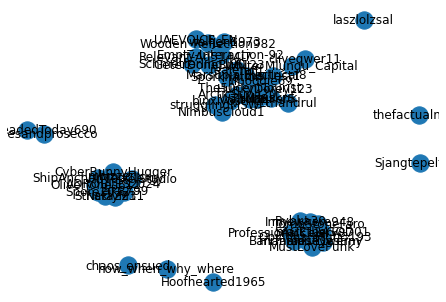

In [25]:
# Draw with a spring layout
nx.draw(g, with_labels=True)
plt.show()

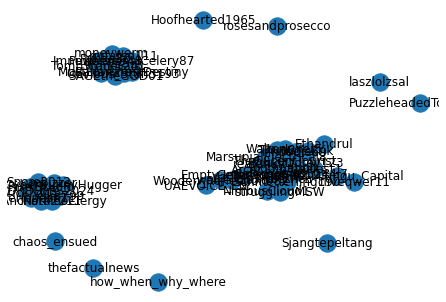

In [26]:
nx.draw_spring(g, with_labels=True)
plt.show()

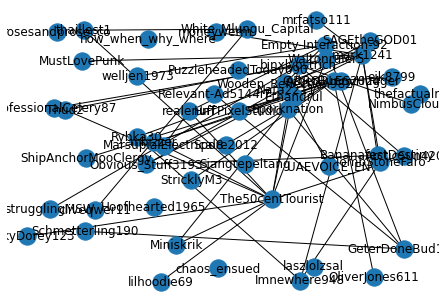

In [27]:
nx.draw_random(g, with_labels=True)
plt.show()

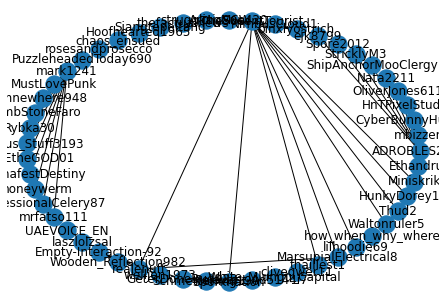

In [28]:
nx.draw_circular(g, with_labels=True)
plt.show()

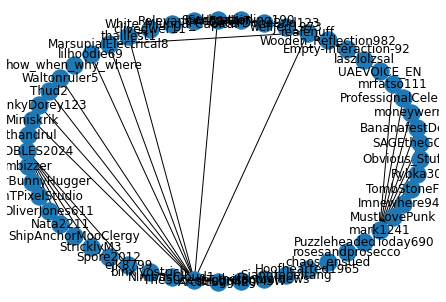

In [29]:
nx.draw_shell(g, with_labels=True)
plt.show()

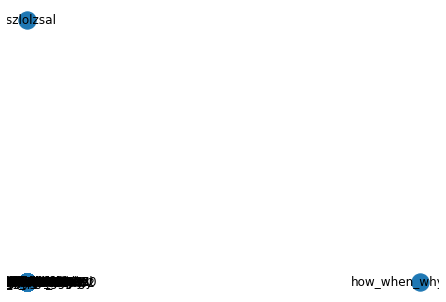

In [30]:
nx.draw_spectral(g, with_labels=True)
plt.show()

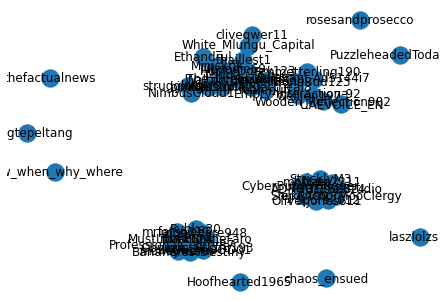

In [31]:
# Construct node positions using FR layout (as in Gephi)
node_positions = nx.fruchterman_reingold_layout(g)

# Draw with the given node positions specified
nx.draw(g, pos=node_positions, with_labels=True)
plt.show()

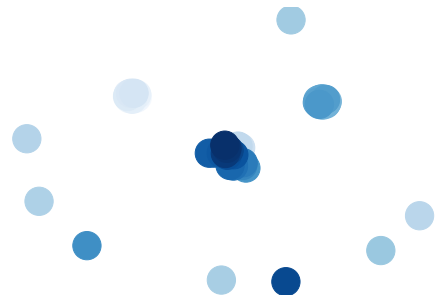

In [32]:
pos = nx.spring_layout(g, iterations=200)

# Randomly color
nx.draw(g, pos, node_color=range(len(g.nodes())), node_size=800, cmap=plt.cm.Blues)
plt.show()

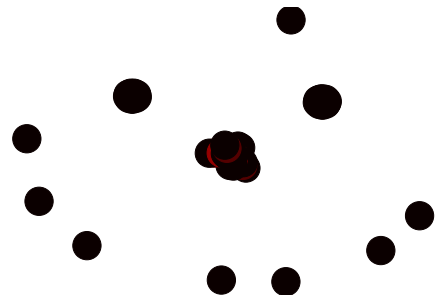

In [33]:
# Color by centrality
max_c = max(centrality.values())
color_map = {x[0]:x[1]/max_c for x in centrality.items()}

nx.draw(g, pos, node_color=list(color_map.values()), node_size=800, cmap=plt.cm.hot)
plt.show()

In [34]:
# For simplicity, let's use GraphML
nx.write_graphml(g, "covid.graphml")

In [35]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 58
Average degree:   2.1887


In [36]:
pip install community

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade networkx

Requirement already up-to-date: networkx in /Users/phunglai/opt/miniconda3/envs/soc/lib/python3.7/site-packages (2.5)
Note: you may need to restart the kernel to use updated packages.


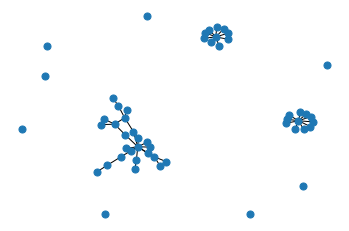

In [38]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(g)
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, with_labels = False, node_size = 50)

In [39]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


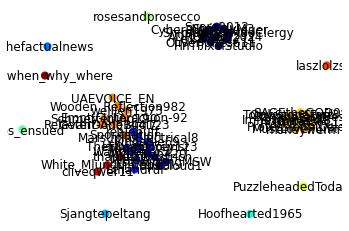

In [48]:
import community
parts = community.best_partition(g)
values = [parts.get(node) for node in g.nodes()]
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 50, with_labels = False)

The50centTourist
0.15120663650075414
Empty-Interaction-92
0.0501508295625943
realenuff
0.046380090497737565
GeterDoneBud123
0.03544494720965308
Sporknation
0.0328054298642534
binxlyostrich
0.03242835595776773
thaillest1
0.031674208144796386
mark1241
0.0301659125188537
ADROBLES2024
0.026395173453996983
Wooden_Reflection982
0.016591251885369536
Miniskrik
0.016591251885369536
White_Mlungu_Capital
0.016591251885369532
Imnewhere948
0.0003770739064856712
Obvious_Stuff3193
0.0003770739064856712
mbizzer
0.0
CyberBunnyHugger
0.0
HnTPixelStudio
0.0
OliverJones611
0.0
Nata2211
0.0
ShipAnchorMooClergy
0.0
StricklyM3
0.0
Spore2012
0.0
ejk8799
0.0
NimbusCloud1
0.0
ArcticSun420
0.0
strugglingMSW
0.0
thefactualnews
0.0
Sjangtepeltang
0.0
Hoofhearted1965
0.0
chaos_ensued
0.0
rosesandprosecco
0.0
PuzzleheadedToday690
0.0
MustLovePunk
0.0
TombStoneFaro
0.0
Rybka30
0.0
SAGEtheGOD01
0.0
BananafestDestiny
0.0
moneywerm
0.0
ProfessionalCelery87
0.0
mrfatso111
0.0
UAEVOICE_EN
0.0
laszlolzsal
0.0
welljen1973
0

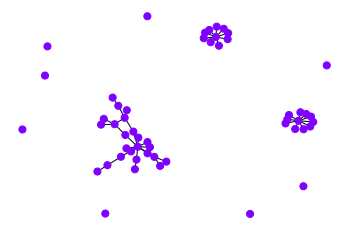

In [53]:
from multiprocessing import Pool
import itertools
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c
bt = between_parallel(g)
top = 100

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [50]*len(g.nodes())
bt_colors = [0]*len(g.nodes())
for max_key, max_val in max_nodes:
    print(max_key)
    print(max_val)
#     bt_values[max_key] = 150
#     bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

